# Loading Pystare and Modules

In [1]:
import pystare

In [2]:
import numpy
import shapely.geometry
import pandas
import geopandas
import matplotlib.pyplot as plt
import shapely.wkt
from pyhdf.SD import SD

# Conversions

In [118]:
lat = numpy.array([30, 45, 60], dtype=numpy.double)
lon = numpy.array([45, 60, 10], dtype=numpy.double)

indices = pystare.from_latlon(lat, lon, 5)
indices

array([4151504989081014885, 4161865161846704581, 3643626718498217157])

In [119]:
lat, lon = pystare.to_latlon(indices)
lat, lon, level = pystare.to_latlonlevel(indices)
print(lat)
print(lon)
print(level)
pystare.to_latlonlevel(indices)

[30.00000012 45.00000003 59.99999986]
[44.99999991 60.00000013  9.9999999 ]
[5 5 5]


(array([30.00000012, 45.00000003, 59.99999986]),
 array([44.99999991, 60.00000013,  9.9999999 ]),
 array([5, 5, 5], dtype=int32))

In [120]:
hdf.select('Latitude')

In [121]:
hdf = SD('../tests/data/MOD05_L2.A2019336.0000.061.2019336211522.hdf')
lats = hdf.select('Latitude')[0:3, 0:3].astype('double')
lons = hdf.select('Longitude')[0:3, 0:3].astype('double')
pystare.from_latlon_2d(lats, lons, adapt_level=True)

array([[4298473764500464809, 4298458168380511209, 4297394569014717897],
       [4298462872969244297, 4298459225563237225, 4297297422977447753],
       [4298462873435275369, 4298459227962358473, 4297297429637206121]])

In [122]:
area = pystare.to_area(indices)
area

array([0.0014197 , 0.00143268, 0.00130733])

# Covers

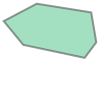

In [134]:
import geopandas
path = geopandas.datasets.get_path('naturalearth_lowres')
world = geopandas.read_file(path)
de = world[world.name=='Poland']
geom = de.simplify(1).iloc[0]
lon, lat = geom.exterior.xy
lat = lat[::-1]
lon = lon[::-1]
geom

In [136]:
pystare.range_from_hull(lat, lon, 4)#.size

array([4251398048237748228, 4255901647865118724, 4258153447678803972,
       4539628424389459972, 4541880224203145220, 4546383823830515716])

In [125]:
pystare.range_from_ring(lat, lon, 5)#.size

array([4254212798004854789, 4255901647865118725, 4256464597818540037,
       4257027547771961349, 4257590497725382661, 4258153447678803973,
       4271664246560915461, 4280671445815656453, 4281234395769077765,
       4282360295675920389, 4284049145536184325, 4285175045443026949,
       4541880224203145221, 4553139223271571461, 4571153621781053445])

In [126]:
pystare.to_vertices_latlon([4254212798004854789])

(array([53.89745687, 56.8965353 , 56.93769843]),
 array([ 9.22866958, 13.23186479,  8.07137938]),
 array([55.93005351]),
 array([10.15342841]))

# Overlay

In [129]:
intersected = pystare.intersection(indices, indices, multi_resolution=False)
print(indices)
print(intersected)
set(indices) == set(intersected)
pystare.to_level(intersected)

[4151504989081014885 4161865161846704581 3643626718498217157]
[3643412098542731269 4151192956528754693 4161326055690338309]


array([5, 5, 5], dtype=int32)

In [112]:
sids = numpy.array([4251398048237748227, 4269412446747230211, 4278419646001971203,])
pystare.intersects(sids, numpy.array([1251398048237748227, 4269412446747230210]), method=2)

array([False,  True])

In [144]:
sids1 = [4251398048237748227, 4269412446747230211, 4278419646001971203, 4539628424389459971]
sids2 = [4251398048237748228, 4255901647865118724, 4258153447678803972, 4539628424389459972]
pystare.intersection(sids1, sids2, multi_resolution=False)

array([4251398048237748228, 4255901647865118724, 4258153447678803972,
       4539628424389459972])